<p align="center"><img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="260" height="110" /></p>

<center><h1><b>Chennai House Price Prediction</b></h1></center>

----
# **Table of Contents**
----

**1.** [**Problem Statement**](#section1)<br>

**2.** [**Installing and Importing Packages**](#section2)<br>
  - **2.1** [**Description of the Dataset**](#section301)<br>
  - **2.2** [**Upgrading Libraries**](#section302)<br>
  - **2.2** [**Importing Libraries**](#section302)<br>

**3.** [**Loading Data**](#section3)<br>

**4.** [**Data Acquistititon and Description**](#section4)<br>
  - **4.1** [**Description of the Dataset**](#section401)<br>
  - **4.2** [**Data Cleaning**](#section40201)<br>

**5.** [**Data Pre-Processing**](#section6)<br>
  - **5.1** [**Pre-Profiling Report**](#section401)<br>
  - **5.2** [**Data Information**](#section40201)<br>

**6.** [**Exploratory Data Analysis**](#section7)<br>
  - **6.1** [**Univariate Analysis**](#section401)<br>
  - **6.2** [**Bivariate Analysis**](#section40201)<br>
  
**7.** [**Data Postprocessing**](#section8)
  - **7.1** [**Encoding Categorical Variables**](#section401)<br>
  - **7.2** [**Feature Engineering**](#section40201)<br>
  - **7.3** [**Separating Train and Test Data**](#section40201)<br>

**8.** [**Modelling**](#section8)
  - **8.1** [**Defining Baseline Models**](#section401)<br>
  - **8.2** [**Hyperparameter Tuning**](#section40201)<br>

**9.** [**Test Set**](#section8)

**10.** [**Conclusion**](#section8)





---
# **1. Problem Statement:-**
---

- **ChennaiEstate** is a **real estate firm** based in **Chennai** that is involved in the property business for the past 5 years.

- Since, they are in the business for so long, they have enough data of all the real estate transactions in the city.

- They decided to venture into Analytics and have now started a division called **Chennai Estate Analytics** to give consumers as much information as possible about housings and the real estate market in Chennai.

-  A home is often the largest and most expensive purchase a person makes in his or her lifetime. Ensuring real-estate owners have a
trusted way to monitor the asset is incredibly important.

-  Hence, they have hired you as a consultant to help them give insights and develop a model to accurately predict real estate prices.

- Based on the **train** dataset, you will need to develop a model that accurately predicts the real estate price in **Chennai**.

<center><img src = "https://therealdeal.com/national/wp-content/uploads/2021/03/CoreLogic-Home-Price-Reports-Highest-Growth-Since-2013.gif"></center>

### **Scenario**

- You are given a dataset consisting of **required details** 

- Your task is to build a **regression model** using the dataset

- Because there was **no machine learning model for this problem** in the company, you don’t have a quantifiable win condition. You need to build the best possible model

<a name=section2></a>

---
# **2. Importing Libraries**
---

In [ ]:
import sys                                                       # Importing System
!{sys.executable} -m pip install -U pandas-profiling[notebook]   # Installing pandas profiling
!jupyter nbextension enable --py widgetsnbextension              # enabling python notebook extention

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [ ]:
!pip install pandas-profiling -q --upgrade                          # Installing pandas profiling  
!pip install catboost -q                                            # Intalling Catboost regressor  
!pip install xgboost -q                                             # Intalling XGboost regressor  

     |████████████████████████████████| 261 kB 15.1 MB/s 
     |████████████████████████████████| 303 kB 39.3 MB/s 
     |████████████████████████████████| 10.1 MB 16.7 MB/s 
     |████████████████████████████████| 3.1 MB 41.1 MB/s 
     |████████████████████████████████| 102 kB 7.2 MB/s 
     |████████████████████████████████| 675 kB 25.2 MB/s 
     |████████████████████████████████| 62 kB 702 kB/s 
     |████████████████████████████████| 596 kB 38.5 MB/s 
     |████████████████████████████████| 812 kB 33.7 MB/s 
     |████████████████████████████████| 38.1 MB 1.4 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.26.0 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but 

<a name = Section22></a>
### **2.2 Upgrading Libraries**

- **After upgrading** the libraries, you need to **restart the runtime** to make the libraries in sync. 

- Make sure not to execute the cell above (2.1) and below (2.2) again after restarting the runtime.

In [ ]:
!pip install pandas-profiling -q --upgrade                          # upgrading pandas profiling

<a name = Section23></a>
### **2.3 Importing Libraries**
- After the **installation** and **upgrading of all the libraries** we will now import the necessary libraries.

In [ ]:
#-------------------------------------------------------------------------------------------------------------------------------

import matplotlib.pyplot as plt                                     # Importing pyplot for visualization
%matplotlib inline

#----------------------------------------------------------------------------------------------
import seaborn as sns
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing for panel data analysis
from pandas_profiling import ProfileReport                          # Importing Pandas Profiling (To generate Univariate Analysis)
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high
pd.set_option('display.max_colwidth', None)                         # Unfolding the max feature width for better clearity
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
pd.set_option('display.float_format', lambda x: '%.5f' % x)         # To suppress scientific notation over exponential values
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
from datetime import datetime as dt                                 # For datetime funcationality
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn import metrics                                         # Calling the metrics for calculating performence metrics
from sklearn import preprocessing                                   # Calling preprocessing for preprocessing of data
from sklearn.preprocessing import StandardScaler                    # Calling standardscaler for standerdization
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.svm import SVR                                         # Calling Support Vector Regressor for modelling
from sklearn.decomposition import PCA                               # Calling PCA for dimentionality reduction
from sklearn.metrics import make_scorer                             # Calling make_scorer for calculating score
from sklearn.metrics import mean_squared_error                      # Calling sean_squared_error for calculating mean squared error
import zipfile                                                      # Importing zipfile
#-------------------------------------------------------------------------------------------------------------------------------
from scipy import stats                                             # Importing stats from scipy
from scipy.stats import norm                                        # Importing norm
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.preprocessing import LabelEncoder, MinMaxScaler        # Importing Encoders
from sklearn.linear_model import LinearRegression, Ridge, Lasso     # Importing Linear Regressors
from sklearn.neighbors import KNeighborsRegressor                   # Importing KNN
from sklearn.ensemble import RandomForestRegressor                  # Importing Random Forest Regressor
from sklearn.ensemble import BaggingRegressor                       # Importing Bagging Regressor
from sklearn.ensemble import GradientBoostingRegressor              # Importing GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor                      # Importing DecissionTreeeRegressor
from catboost import CatBoostRegressor                              # Importing CatBoostRegressor
from xgboost import XGBRegressor                                    # Importing XGBoost Regressor
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split                # Calling train_test_split for splitinng the dataset 
from sklearn.model_selection import RandomizedSearchCV              # Calling RandomizedSearchCV for tuning the model
from sklearn.model_selection import cross_val_score                 # Importing cross_val_score  
from sklearn.model_selection import GridSearchCV                    # Importing GridsearchCV
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.metrics import mean_squared_error                      # Importing MSE
from sklearn.metrics import r2_score                                # Importing R Squared
from sklearn.metrics import mean_absolute_error                     # Importing MAE
#-------------------------------------------------------------------------------------------------------------------------------
import time                                                         # Importing time
import re                                                           # Importing RegEx  
import plotly.express as ex                                         # Importing Plotly Express for Dynamic Plotting
import plotly.graph_objs as go                                      # Importing Plotly graphs for Dynamic Plotting
import plotly.offline as pyo                                        # Importing offline Express for Dynamic Plotting
from plotly.subplots import make_subplots                           # Importing Plotly Subplots to plot Dynamic subplots
import plotly.figure_factory as ff                                  # Calling the figure factory to create unique chart types

----
<a id=section3></a>
# **3. Loading Data**
----

- In this step we will be **Loading the dataset**

In [ ]:
data = pd.read_csv("/content/chennai_house_price_prediction.csv")

In [ ]:
data.head()

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,131,1.0,1.0,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,144400,7600000
1,P09411,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,304049,21717770
2,P01812,Adyar,909,70,1.0,1.0,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,92114,13159200
3,P05346,Velachery,1855,14,3.0,2.0,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,77042,9630290
4,P06210,Karapakkam,1226,84,1.0,1.0,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,74063,7406250


In [ ]:
data.shape

(7109, 19)

----
<a id=section3></a>
# **4. Data Acquistion and Description**
----




### **4.1 Description of the Dataset**
- We have **7109 samples**  and for each of sample **19 different** properties are recorded.


In [ ]:
data.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
count,7109.00000,7109.00000,7108.00000,7104.00000,7109.00000,7109.00000,7109.00000,7109.00000,7061.00000,7109.00000,7109.00000
mean,1382.07301,99.60318,1.63703,1.21326,3.68870,3.51747,3.50724,3.48530,3.50325,141005.72654,10894909.63919
std,457.41090,57.40311,0.80290,0.40964,1.01910,0.89197,0.89783,0.88727,0.52722,78768.09372,3768603.45700
min,500.00000,0.00000,1.00000,1.00000,2.00000,2.00000,2.00000,2.00000,2.00000,5055.00000,2156875.00000
25%,993.00000,50.00000,1.00000,1.00000,3.00000,2.70000,2.70000,2.70000,3.13000,84219.00000,8272100.00000
50%,1373.00000,99.00000,1.00000,1.00000,4.00000,3.50000,3.50000,3.50000,3.50000,127628.00000,10335050.00000
75%,1744.00000,148.00000,2.00000,1.00000,4.00000,4.30000,4.30000,4.30000,3.89000,184506.00000,12993900.00000
max,2500.00000,200.00000,4.00000,2.00000,6.00000,5.00000,5.00000,5.00000,4.97000,495405.00000,23667340.00000


**Observation:**

- The mean of the **SALES_PRICE** is found to be **10894909.63919** which is deviating from the std.


<a name = Section42></a>
### **4.2 Data Information**

- In this section we will see the **information about the types of features**.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DIST_MAINROAD  7109 non-null   int64  
 4   N_BEDROOM      7108 non-null   float64
 5   N_BATHROOM     7104 non-null   float64
 6   N_ROOM         7109 non-null   int64  
 7   SALE_COND      7109 non-null   object 
 8   PARK_FACIL     7109 non-null   object 
 9   BUILDTYPE      7109 non-null   object 
 10  UTILITY_AVAIL  7109 non-null   object 
 11  STREET         7109 non-null   object 
 12  MZZONE         7109 non-null   object 
 13  QS_ROOMS       7109 non-null   float64
 14  QS_BATHROOM    7109 non-null   float64
 15  QS_BEDROOM     7109 non-null   float64
 16  QS_OVERALL     7061 non-null   float64
 17  COMMIS         7109 non-null   int64  
 18  SALES_PR

### **Observation:**

- There are total **13 numerical data-type and 8 object type data files** recorded.


<a name = Section5></a>

---
# **5. Data Pre-Processing**
---

<a name = Section51></a>
### **5.1 Pre Profiling Report**

- For **quick analysis** pandas profiling is very handy.

- Generates profile reports from a pandas DataFrame.

- For each column **statistics** are presented in an interactive HTML report.

In [ ]:
profile = ProfileReport(df=data)
profile.to_file(output_file='Pre Profiling Report.html')
print('Accomplished!')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Accomplished!


<a name = Section5></a>
### **5.2 Data Cleaning**

- In this section, we will **clean out** our data based on the information retrieved from the previous observations.

- Hence, we will have to perform the following subtasks
  - Checking for **missing values** and **manipulating** them
  - Checking the **datatypes**
  - Checking of the **Spelling Correction**

In [ ]:
# Checking for missing values and manipulating them
data.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
COMMIS            0
SALES_PRICE       0
dtype: int64

In [ ]:
#Checking the datatype
data.dtypes

PRT_ID            object
AREA              object
INT_SQFT           int64
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
COMMIS             int64
SALES_PRICE        int64
dtype: object

In [ ]:
# Treating the missing values:-
data["QS_OVERALL"] = data["QS_OVERALL"].fillna(data["QS_OVERALL"].mean())
data["N_BEDROOM"] = data["N_BEDROOM"].fillna(data["N_BEDROOM"].mean())
data["N_BATHROOM"] = data["N_BATHROOM"].fillna(data["N_BATHROOM"].mean())

In [ ]:
data.isnull().sum()

PRT_ID           0
AREA             0
INT_SQFT         0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
COMMIS           0
SALES_PRICE      0
dtype: int64

In [ ]:
# Checking Value Counts:- 
for i in data.columns:
    print("************************************")
    print("The Value Count for " + i + " is :-" )
    print(data[i].value_counts())
    print("************************************")

Streaming output truncated to the last 5000 lines.
9680500     1
9107430     1
13427680    1
8677460     1
12195890    1
21320640    1
15030330    1
8718400     1
10768300    1
9508930     1
11855940    1
3250250     1
7399500     1
12695630    1
13785170    1
11679830    1
13979000    1
14898480    1
8865880     1
9463900     1
10090590    1
6375000     1
8939620     1
9357800     1
11450470    1
11879730    1
10983530    1
4155500     1
21660460    1
10643500    1
8624170     1
9472040     1
7194600     1
8886250     1
9865200     1
13113330    1
7609525     1
12564470    1
13640240    1
16222200    1
9365500     1
8243200     1
6248450     1
10315780    1
4788000     1
18286600    1
8224125     1
11401230    1
21141390    1
11045960    1
6889250     1
12427940    1
12863520    1
13461540    1
8353830     1
7862110     1
6334300     1
7151680     1
5125790     1
11536000    1
10139270    1
6602375     1
7919880     1
7839500     1
9967250     1
8725650     1
20477590    1
20940440   

In [ ]:
# Dropping PRT_ID:- 
data = data.drop(["PRT_ID"],axis=1)

In [ ]:
# Replacing "AREA" with the respective values:
data["AREA"].replace(to_replace = ["Chrompt","Chormpet","Chrmpet"], value ="Chrompet",inplace=True)

data["AREA"].replace(to_replace=["Karapakam","KKNagar","Velchery","Ana Nagar","Ann Nagar","Adyr","TNagar"], 
                     value=["Karapakkam","KK Nagar","Velachery","Anna Nagar","Anna Nagar","Adyar","T Nagar"]  
                    ,inplace=True)

In [ ]:
data["AREA"].value_counts()

Chrompet      1702
Karapakkam    1366
KK Nagar       997
Velachery      981
Anna Nagar     788
Adyar          774
T Nagar        501
Name: AREA, dtype: int64

In [ ]:
pd.get_dummies(data["SALE_COND"])
data["SALE_COND"].replace(to_replace=["Adj Land","Partiall","PartiaLl","Ab Normal"], 
                     value=["AdjLand","Partial","Partial","AbNormal"]  
                    ,inplace=True)

In [ ]:
data["SALE_COND"].value_counts()

AdjLand        1439
Partial        1433
Normal Sale    1423
AbNormal       1411
Family         1403
Name: SALE_COND, dtype: int64

In [ ]:
data["SALE_COND"].value_counts()

AdjLand        1439
Partial        1433
Normal Sale    1423
AbNormal       1411
Family         1403
Name: SALE_COND, dtype: int64

In [ ]:
data.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
0,Karapakkam,1004,131,1.00000,1.00000,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.00000,3.90000,4.90000,4.33000,144400,7600000
1,Anna Nagar,1986,26,2.00000,1.00000,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.90000,4.20000,2.50000,3.76500,304049,21717770
2,Adyar,909,70,1.00000,1.00000,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.10000,3.80000,2.20000,3.09000,92114,13159200
3,Velachery,1855,14,3.00000,2.00000,5,Family,No,Others,NoSewr,Paved,I,4.70000,3.90000,3.60000,4.01000,77042,9630290
4,Karapakkam,1226,84,1.00000,1.00000,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.00000,2.50000,4.10000,3.29000,74063,7406250


In [ ]:
data["PARK_FACIL"].value_counts()

Yes    3587
No     3520
Noo       2
Name: PARK_FACIL, dtype: int64

In [ ]:
data["PARK_FACIL"].replace(to_replace=["Noo"],value = ["No"], inplace = True)

In [ ]:
data["PARK_FACIL"].value_counts()

Yes    3587
No     3522
Name: PARK_FACIL, dtype: int64

In [ ]:
data["BUILDTYPE"].value_counts()

House         2444
Commercial    2325
Others        2310
Other           26
Comercial        4
Name: BUILDTYPE, dtype: int64

In [ ]:
data["BUILDTYPE"].replace(to_replace=["Comercial","Other"],value = ["Commercial","Others"], inplace = True)

In [ ]:
data["BUILDTYPE"].value_counts()

House         2444
Others        2336
Commercial    2329
Name: BUILDTYPE, dtype: int64

In [ ]:
data["UTILITY_AVAIL"].value_counts()

AllPub     1886
NoSeWa     1871
NoSewr     1829
ELO        1522
All Pub       1
Name: UTILITY_AVAIL, dtype: int64

In [ ]:
data["UTILITY_AVAIL"].replace(to_replace=["All Pub"],value = ["AllPub"], inplace = True)

In [ ]:
data["UTILITY_AVAIL"].value_counts()

AllPub     1887
NoSeWa     1871
NoSewr     1829
ELO        1522
Name: UTILITY_AVAIL, dtype: int64

In [ ]:
data["STREET"].value_counts()

Paved        2560
Gravel       2520
No Access    2010
Pavd           12
NoAccess        7
Name: STREET, dtype: int64

In [ ]:
data["STREET"].replace(to_replace = ["Pavd","NoAccess"], value=["Paved","No Access"], inplace = True)

In [ ]:
data["STREET"].value_counts()

Paved        2572
Gravel       2520
No Access    2017
Name: STREET, dtype: int64

In [ ]:
data["MZZONE"].value_counts()

RL    1858
RH    1822
RM    1817
C      550
A      537
I      525
Name: MZZONE, dtype: int64

In [ ]:
datatype = data.dtypes

In [ ]:
datatype

AREA              object
INT_SQFT           int64
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
COMMIS             int64
SALES_PRICE        int64
dtype: object

<a name = Section5></a>

---
# **6. Exploratory Data Analysis**
---

### **6.1 Univariate Analysis**

- In this section we will see what information can be derived from each individual feature of the dataset. 

#### **Question:** What insights can be drawn from the categorical features ?

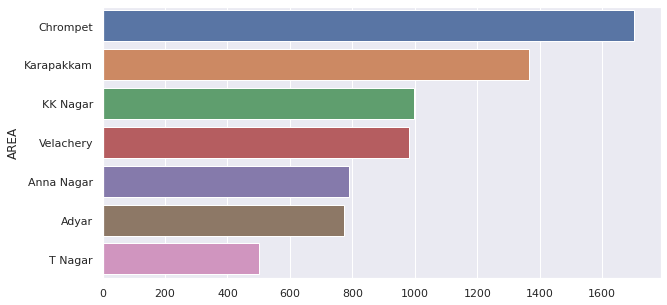

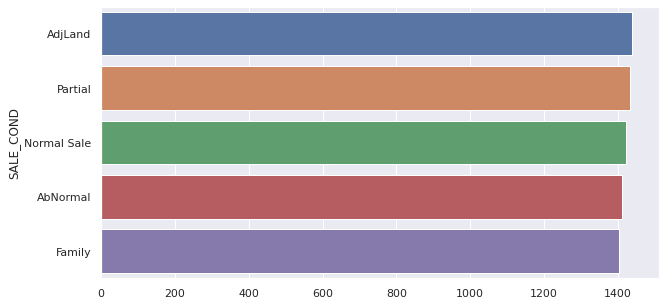

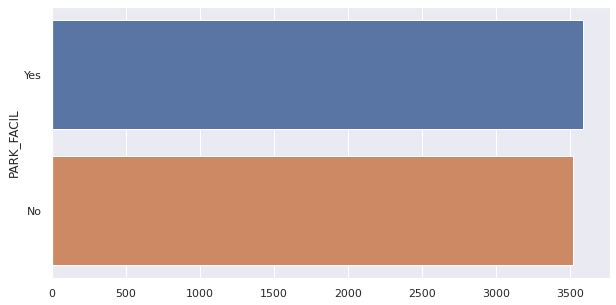

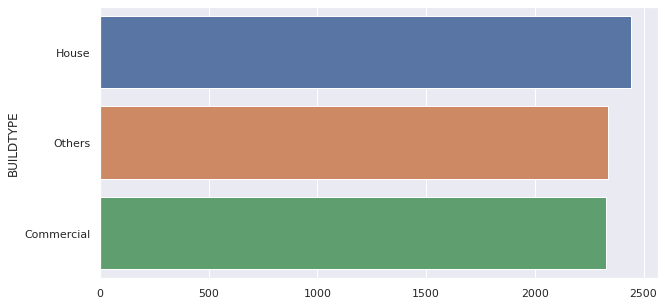

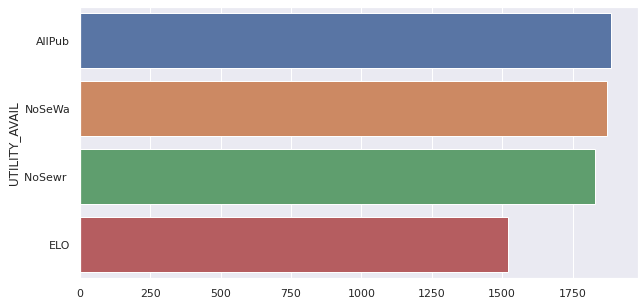

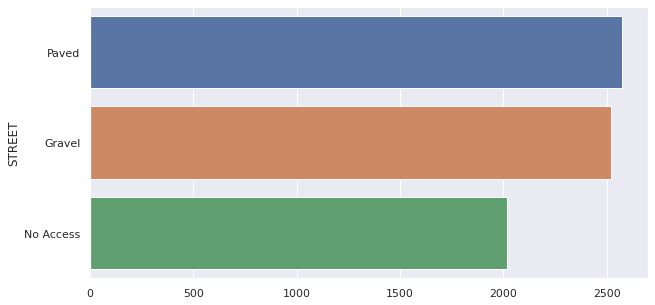

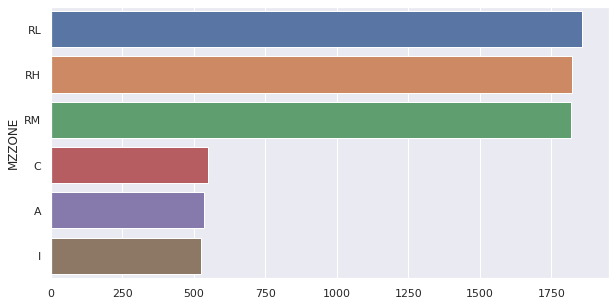

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

for i in data.columns:
    if datatype[i] == 'object':
        plt.figure(figsize = (10,5))
        sns.barplot(x = data[i].value_counts().values,
                    y = data[i].value_counts().index,
                    orient = 'h')
        plt.ylabel(i)

**Observations:**

- The freq of **RL** is maximum for **MZZONE**

- **Paved** type streets has been reported maximum number of times.

- **UTILITY_AVAIL** has **AllPub** recorded the maximum number of times.

#### **Question:** What insights can be drawn from the numerical features ?

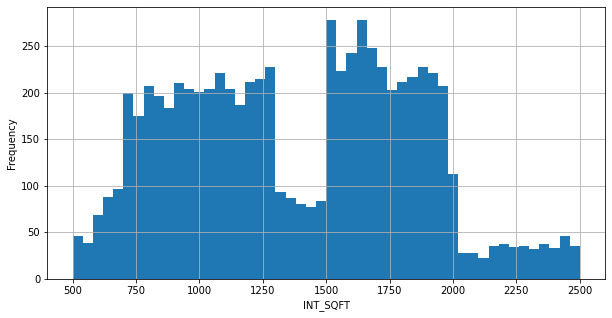

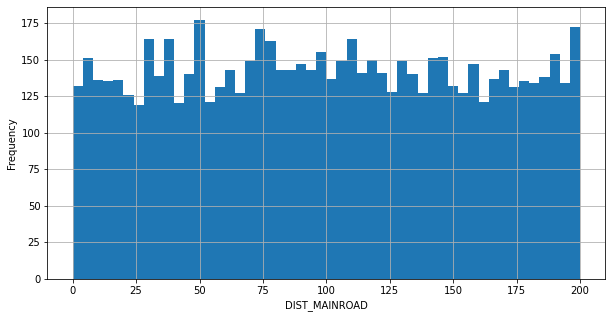

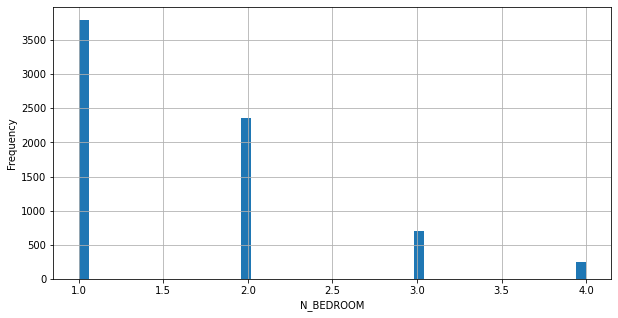

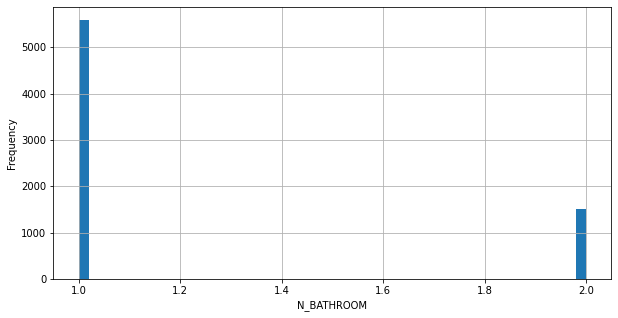

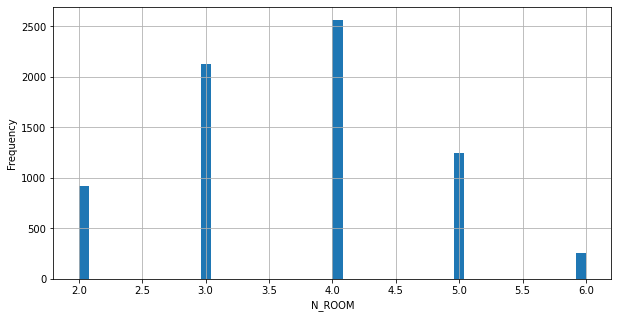

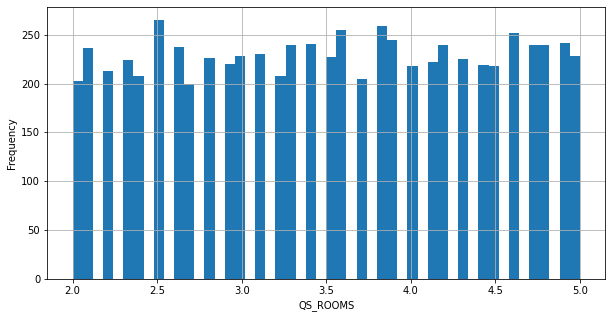

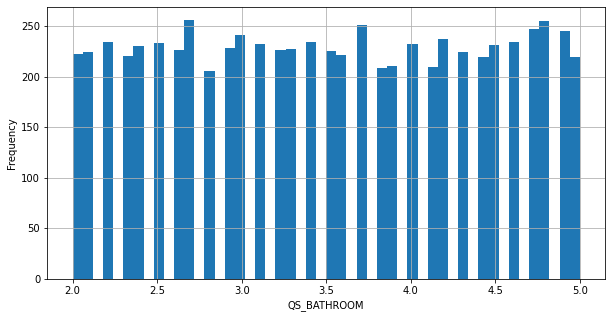

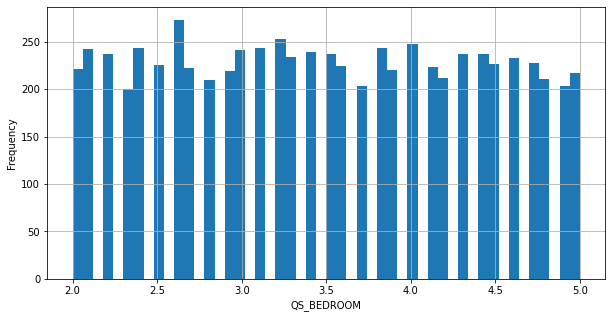

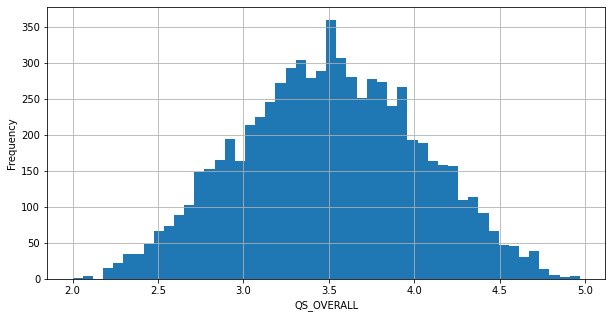

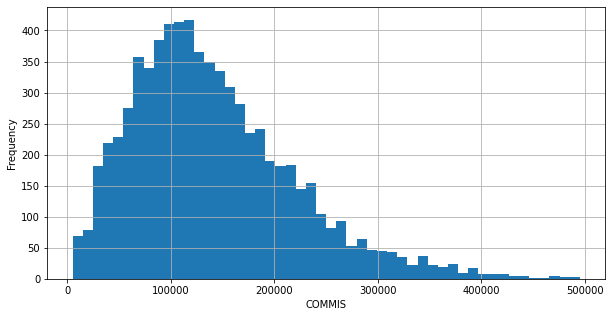

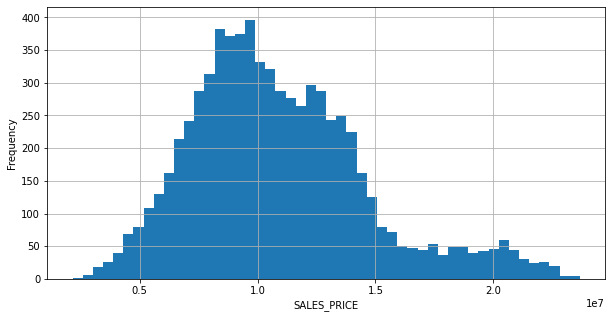

In [ ]:
for i in data.columns:
    if datatype[i] != 'object':
        plt.figure(figsize = (10,5))
        data[i].plot.hist(bins=50)
        plt.xlabel(i)
        plt.grid()

### **6.2 Univariate Analysis**

- In this section we will see what information can be derived from more than one features at a time. 

#### **Question:** What is the relation in between **BUILDTYPE** and **PARK_FACIL** w.r.t average **SALES_PRICE**?

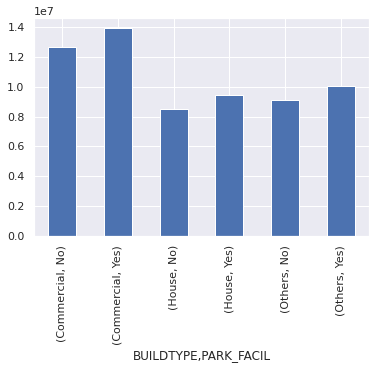

In [ ]:
import seaborn as sns
sns.set()
temp = data.groupby(['BUILDTYPE', 'PARK_FACIL']).SALES_PRICE.median()
temp.plot(kind = 'bar', stacked = True)

#### **Question:** What is the deviation in **PARK_FACIL** w.r.t **SALES_PRICE**?

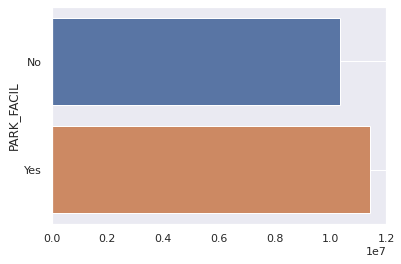

In [ ]:
temp = data.groupby(['PARK_FACIL']).SALES_PRICE.mean()
temp_index = temp.index
temp_values = temp.values 
sns.barplot(temp_values,
            temp_index,
            orient = 'h')
plt.grid()

#### **Question:** How **SALE_PRICE** effects the **distance from main road**?

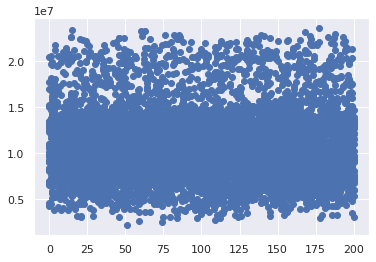

In [ ]:
plt.scatter(data['DIST_MAINROAD'],data['SALES_PRICE'])

----
<a id=section6></a>
# **7. Data Postprocecssing**
---- 

<a name = Section71></a>
### **7.1 Data encoding**

- We will use **encode** the necessary features

In [ ]:
# OneHot Encode the Catagorical Variables
a,b,c,d,e,f = pd.get_dummies(data["AREA"]),pd.get_dummies(data["PARK_FACIL"]),pd.get_dummies(data["BUILDTYPE"]),pd.get_dummies(data["UTILITY_AVAIL"]),pd.get_dummies(data["STREET"]),pd.get_dummies(data["MZZONE"]) 

In [ ]:
y= pd.get_dummies(data["SALE_COND"])

In [ ]:
a.head()

,Adyar,Anna Nagar,Chrompet,KK Nagar,Karapakkam,T Nagar,Velachery
0,0,0,0,0,1,0,0
1,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0
3,0,0,0,0,0,0,1
4,0,0,0,0,1,0,0


In [ ]:
b.head()

,No,Yes
0,0,1
1,1,0
2,0,1
3,1,0
4,0,1


In [ ]:
c.head()

,Commercial,House,Others
0,1,0,0
1,1,0,0
2,1,0,0
3,0,0,1
4,0,0,1


In [ ]:
d.head()

,AllPub,ELO,NoSeWa,NoSewr
0,1,0,0,0
1,1,0,0,0
2,0,1,0,0
3,0,0,0,1
4,1,0,0,0


In [ ]:
e.head()

,Gravel,No Access,Paved
0,0,0,1
1,1,0,0
2,1,0,0
3,0,0,1
4,1,0,0


In [ ]:
f.head()

,A,C,I,RH,RL,RM
0,1,0,0,0,0,0
1,0,0,0,1,0,0
2,0,0,0,0,1,0
3,0,0,1,0,0,0
4,0,1,0,0,0,0


<a name = Section71></a>
### **7.2 Feature genaration**

- In this step we will use **genarate new features**

In [ ]:
for i in range(len(a.columns)):
    data.insert(0+i,a.columns[i],a[a.columns[i]])
for i in range(len(b.columns)):
    data.insert(11+i,b.columns[i],b[b.columns[i]])
for i in range(len(c.columns)):
    data.insert(12+i,c.columns[i],c[c.columns[i]])
for i in range(len(d.columns)):
    data.insert(13+i,d.columns[i],d[d.columns[i]])
for i in range(len(e.columns)):
    data.insert(14+i,e.columns[i],e[e.columns[i]])
for i in range(len(f.columns)):
    data.insert(15+i,f.columns[i],f[f.columns[i]])

for i in range(len(y.columns)):
    data.insert(7+i,y.columns[i],y[y.columns[i]])
    

<a name = Section71></a>
### **7.2 Feature Dropping**

- In this step we will use **genarate new features**

In [ ]:
# Dropping unnecessary features
data.drop(['AREA','SALE_COND','PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE'], axis=1 , inplace= True)

In [ ]:
data.head()

,Adyar,Anna Nagar,Chrompet,KK Nagar,Karapakkam,T Nagar,Velachery,AbNormal,AdjLand,Family,Normal Sale,Partial,INT_SQFT,DIST_MAINROAD,N_BEDROOM,No,Commercial,AllPub,Gravel,A,C,I,RH,RL,RM,No Access,Paved,ELO,NoSeWa,NoSewr,House,Others,Yes,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
0,0,0,0,0,1,0,0,1,0,0,0,0,1004,131,1.00000,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1.00000,3,4.00000,3.90000,4.90000,4.33000,144400,7600000
1,0,1,0,0,0,0,0,1,0,0,0,0,1986,26,2.00000,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1.00000,5,4.90000,4.20000,2.50000,3.76500,304049,21717770
2,1,0,0,0,0,0,0,1,0,0,0,0,909,70,1.00000,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1.00000,3,4.10000,3.80000,2.20000,3.09000,92114,13159200
3,0,0,0,0,0,0,1,0,0,1,0,0,1855,14,3.00000,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,2.00000,5,4.70000,3.90000,3.60000,4.01000,77042,9630290
4,0,0,0,0,1,0,0,1,0,0,0,0,1226,84,1.00000,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,1,1.00000,3,3.00000,2.50000,4.10000,3.29000,74063,7406250


<a name = Section72></a>
### **7.4 Feature Extraction**

- We will seperate the dataframe into train and validation sets.

- We will **seperate** the train set into X (independent) and y (dependent) dataframes.

- Finally, we will apply **train-test split** on the scaled data.

In [ ]:
x= data.drop(["SALES_PRICE"],axis=1)
y= data["SALES_PRICE"]

<a id=section7></a>

---
# **8. Model Building**
---

### **8.1 Defining Baseline Models**
- In this section we will define all of the **best possible basine models** and train using the **training data**

In [ ]:
# Defining the scores list
model_scores = []

# Defining a list of useful regressors
regressors = [RandomForestRegressor(random_state=42), 
              KNeighborsRegressor(),
              GradientBoostingRegressor(random_state=42),
              CatBoostRegressor(random_state=42),
              XGBRegressor(random_state=42),
              BaggingRegressor(random_state=42)]

### **8.2 Splitting training and Testing Data**
- In this section we will make the **train** and the **test** data.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y,
                                                    test_size = 0.25,
                                                    random_state = 42)

In [ ]:
for reg in regressors:
  # Extracting model name
  model_name = type(reg).__name__

  # Fit the model on train data
  reg.fit(X_train, y_train)

  # Make predictions using train data
  y_train_pred = reg.predict(X_train)

  # Make predictions using test data
  y_pred = reg.predict(X_test)

  # Calculate train rmse of the model
  reg_train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))

  # Calculate test rmse of the model
  reg_test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
  
  # Calculating train R2 Score
  reg_train_r2 = r2_score(y_train, y_train_pred)

  # Calculating test R2 Score
  reg_test_r2 = r2_score(y_test, y_pred)

  # Display the accuracy of the model
  print('Performance Metrics for', model_name, ':')
  #print('[RMSE-Score Train]:', reg_train_rmse)
  #print('[RMSE-Score Test]:', reg_test_rmse)
  print('[R2-Score Train]:', reg_train_r2)
  print('[R2-Score Test]:', reg_test_r2)

  model_scores.append((model_name,
                       reg_train_r2,
                       reg_test_r2))

  print('--------------------\n')

Performance Metrics for RandomForestRegressor :
[R2-Score Train]: 0.997170972876042
[R2-Score Test]: 0.9780645476747565
--------------------

Performance Metrics for KNeighborsRegressor :
[R2-Score Train]: 0.6141013820751215
[R2-Score Test]: 0.3911477993951279
--------------------

Performance Metrics for GradientBoostingRegressor :
[R2-Score Train]: 0.9880924916131177
[R2-Score Test]: 0.9859462704773483
--------------------

Learning rate set to 0.053335
0:	learn: 3640678.2453024	total: 3.49ms	remaining: 3.49s
1:	learn: 3486731.5294076	total: 6.43ms	remaining: 3.21s
2:	learn: 3336732.3728447	total: 9.3ms	remaining: 3.09s
3:	learn: 3196581.1583712	total: 12.2ms	remaining: 3.03s
4:	learn: 3061469.9981998	total: 15ms	remaining: 2.98s
5:	learn: 2945459.5070608	total: 17.8ms	remaining: 2.95s
6:	learn: 2826090.1884413	total: 20.7ms	remaining: 2.94s
7:	learn: 2710040.5253846	total: 23.7ms	remaining: 2.94s
8:	learn: 2604283.7720803	total: 27ms	remaining: 2.98s
9:	learn: 2509207.8610225	total:

In [ ]:
models = pd.DataFrame(data=model_scores, columns=['Model', '[R2-Score Train]', '[R2-Score Test]'])
models

,Model,[R2-Score Train],[R2-Score Test]
0,RandomForestRegressor,0.99717,0.97806
1,KNeighborsRegressor,0.61410,0.39115
2,GradientBoostingRegressor,0.98809,0.98595
3,CatBoostRegressor,0.99824,0.99558
4,XGBRegressor,0.98767,0.98519
5,BaggingRegressor,0.99538,0.97380


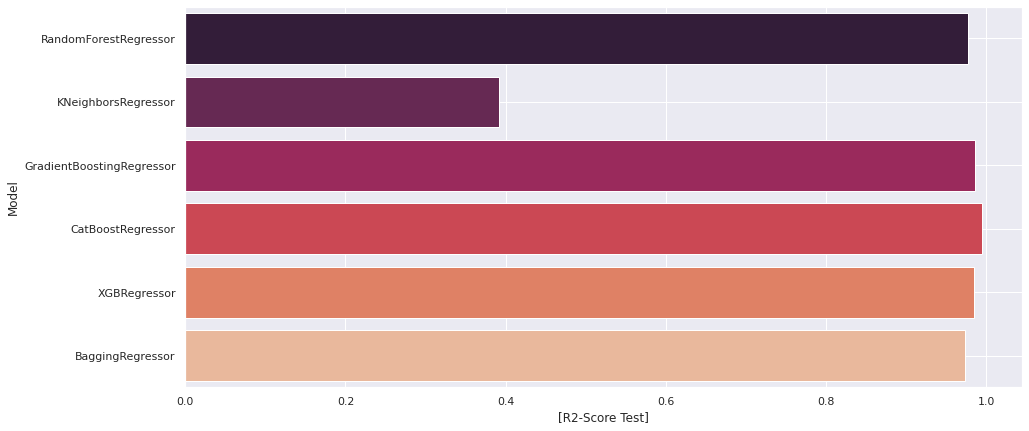

In [ ]:
# Plotting the RMSE scores for each model
fig = plt.figure(figsize=(15,7))
sns.barplot((models['[R2-Score Test]']), models['Model'], palette='rocket')
plt.grid(b=True)

### **8.2 Hyperpameter tuning**

- In this section we will perform **hyperparameter tuning** and check how our models perform post tuning.

- We will be using **Random Search** in order to find the best values.

- We will consider **CatBoost Regressor** and **XGB Regresosor** as they have given best results

In [ ]:
# Creating a parameter grid for CatBoost Regressor
param_grid_cat  = {'iterations': [100, 150, 200],
                   'learning_rate': [0.03, 0.1],
                   'depth': [2, 4, 6, 8],
                   'l2_leaf_reg': [0.2, 0.5, 1, 3]}

cbr = CatBoostRegressor(random_state=42)
gscv = RandomizedSearchCV(estimator = cbr,
                          param_distributions = param_grid_cat,
                          scoring ='r2',
                          cv = 5)
gscv.fit(X_train, y_train)

# Printing metrics
print("[Hyperparameters]:", gscv.best_params_)
print("[Train Score]:", gscv.best_score_)
print("[Validation Score]:", r2_score(y_test,
                                      gscv.predict(X_test)))

Streaming output truncated to the last 5000 lines.
3:	learn: 2782090.2815192	total: 12.1ms	remaining: 593ms
4:	learn: 2568328.1226681	total: 14.8ms	remaining: 576ms
5:	learn: 2392563.1270468	total: 17.5ms	remaining: 565ms
6:	learn: 2230474.4650581	total: 20.5ms	remaining: 564ms
7:	learn: 2071033.8990034	total: 23.1ms	remaining: 555ms
8:	learn: 1937743.8643232	total: 26.3ms	remaining: 558ms
9:	learn: 1810561.8914607	total: 29ms	remaining: 552ms
10:	learn: 1708395.2142640	total: 31.7ms	remaining: 545ms
11:	learn: 1599938.1990924	total: 34.5ms	remaining: 541ms
12:	learn: 1506797.0955278	total: 37.2ms	remaining: 535ms
13:	learn: 1427389.4374269	total: 39.9ms	remaining: 530ms
14:	learn: 1344458.1171582	total: 42.6ms	remaining: 525ms
15:	learn: 1273561.3270455	total: 45.3ms	remaining: 521ms
16:	learn: 1207663.5372607	total: 48.1ms	remaining: 518ms
17:	learn: 1155077.6096574	total: 50.8ms	remaining: 514ms
18:	learn: 1093936.2477714	total: 53.5ms	remaining: 510ms
19:	learn: 1043345.1009391	tot

<a id=section7></a>

---
# **9. Test Set**
---
- We will use the **CatBoost regressor** as gives the best **R2 Score** among the three tuned models.

In [ ]:
# Predicting with the best fit parameters
best_fit = gscv.best_estimator_
best_fit.fit(X_train, y_train)

0:	learn: 3493233.3173993	total: 8.15ms	remaining: 1.62s
1:	learn: 3205252.4218370	total: 19.3ms	remaining: 1.91s
2:	learn: 2953625.3851900	total: 29.6ms	remaining: 1.94s
3:	learn: 2737573.2089503	total: 35.4ms	remaining: 1.73s
4:	learn: 2525481.4932961	total: 45.2ms	remaining: 1.76s
5:	learn: 2350807.2212023	total: 60.3ms	remaining: 1.95s
6:	learn: 2182417.8706681	total: 65.3ms	remaining: 1.8s
7:	learn: 2030055.4643329	total: 68.9ms	remaining: 1.65s
8:	learn: 1900234.0976011	total: 75.4ms	remaining: 1.6s
9:	learn: 1777334.0763628	total: 88.4ms	remaining: 1.68s
10:	learn: 1664686.7158204	total: 98.1ms	remaining: 1.69s
11:	learn: 1561355.0334745	total: 107ms	remaining: 1.68s
12:	learn: 1472815.2686822	total: 116ms	remaining: 1.67s
13:	learn: 1396084.4355102	total: 125ms	remaining: 1.67s
14:	learn: 1329975.6557163	total: 130ms	remaining: 1.6s
15:	learn: 1263583.9115025	total: 134ms	remaining: 1.54s
16:	learn: 1197768.0022896	total: 137ms	remaining: 1.48s
17:	learn: 1133418.0274146	total:

In [ ]:
# storing all best tvalues in to y_pred_tuned
y_pred_tuned = best_fit.predict(X_test)

In [ ]:
from sklearn import metrics
print('R2 Score in Test data is : ',r2_score(y_test, y_pred_tuned))

R2 Score in Test data is :  0.9951656500169215


<a id=section7></a>

---
# **10. Making Pickle File**
---
- We can see that our model performs **really good** in **unseen data**.
- Hence, we can say that our model is **Ready to Deploy**
- For this we will have to import **pickle**
- After that we need to form a **.pkl file**

In [ ]:
import pickle
# open a file, where you ant to store the data
file = open('chennai_house.pkl', 'wb')

# dump information to that file
pickle.dump(best_fit, file)

<a id=section7></a>

---
# **10. Conclusion**
---

- In this case study the given data was analysed and on top of that a **regression model** was built.

- The model chosen for this case study was a **Catboost regressor** as it was retruning the least overfitting and best r2 score on **unseen data**

- The **r2 score** genarated in unseen data was **0.99** which means that the modedl performs really good and is generalizing well on unseen data.

- After modelling we dumped oue model into a pickle file and we can conclude that now our model is **ready to deploy**